In [1]:
import os
import matplotlib.pyplot as plt
from interstellar import Tracks, set_seed

In [2]:
seed = 101
name = 'tracks_03'
tracks_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
tracks = Tracks(name=name)
tracks.load(tracks_path)

In [3]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [4]:
tracks.get_data().head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,initial_feh_norm,log_initial_Yinit_norm,log_initial_Z_norm,frac_he_core_mass_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,-1.880058,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.734604,0.007556,-0.155094,0.229712,-0.006076,0.003246,-0.012479
1,-1.824820,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.679366,0.007601,-0.154709,0.229138,-0.006265,0.003086,-0.012614
2,-1.766652,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.621198,0.007644,-0.154313,0.228547,-0.006491,0.002894,-0.012777
3,-1.705793,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.560340,0.007686,-0.153899,0.227932,-0.006767,0.002660,-0.012976
4,-1.642494,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.497041,0.007731,-0.153461,0.227281,-0.007098,0.002381,-0.013213


In [5]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm', 'frac_he_core_mass_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

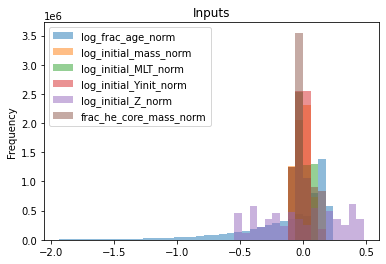

In [6]:
ax = tracks.get_data().plot(kind='hist',
                       y=x_cols,
                       bins=40, alpha=0.5)
ax.set_title('Inputs');

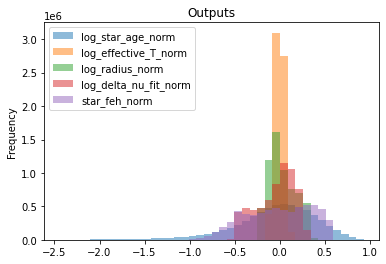

In [7]:
ax = tracks.get_data().plot(kind='hist',
                       y=y_cols,
                       bins=40, alpha=0.5)
ax.set_title('Outputs');

Shuffle the data and select columns

In [13]:
set_seed(seed)
data = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,frac_he_core_mass_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
3162884,-0.189163,0.029384,0.043219,0.030121,0.471462,0.0,-0.086021,-0.006214,-0.078068,0.131739,0.546577
1667556,-0.002536,0.079181,-0.048551,-0.066789,-0.074822,0.0,-0.163146,0.028332,0.091255,-0.098357,-0.304225
3506178,-0.113468,0.041393,-0.000246,-0.032027,0.109996,0.0,-0.125386,0.017360,-0.017984,0.048159,0.106664
5826782,-0.463693,-0.065502,0.043219,0.000158,-0.395224,0.0,-0.315533,0.019922,-0.165888,0.211007,-0.361815
702677,-0.054868,0.068186,-0.000246,-0.032027,0.400452,0.0,0.038743,-0.004367,0.006893,0.025918,0.422864


In [14]:
print(f'Length of dataset = {len(data)}')

Length of dataset = 6354056


In [15]:
train = data.head(int(0.8*len(data)) + 1)
val = data.tail(int(0.2*len(data)))

data = None  # Remove the data variable, no longer needed

In [16]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5083245
Length of validation data = 1270811


In [17]:
train.to_csv(os.path.join(tracks_path, f'{tracks.name}_train.csv'), index=False)
val.to_csv(os.path.join(tracks_path, f'{tracks.name}_val.csv'), index=False)